# Session 1

Let's get hands-on! During today's exercise, we will be starting from the basics: 
- Accessging the data files from the ATLAS Open Data website.
- The tools you will be using to access and visualise: $\texttt{python}$ in $\texttt{jupyter notebook}$, $\texttt{numpy}$ and finally, ROOT.
- Histograms and data analysis with $\texttt{numpy}$.
- Lorentz vectors and data analysis with $\texttt{numpy}$.

## ATLAS Open Data

[ATLAS Open Data](http://opendata.atlas.cern/) is an open dataset of both simulated and real proton-proton collision events. 
We will be using the [ATLAS 13 TeV Open Dataset](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html). 


## Analysis Tools


In today's session we will be using $\texttt{uproot}$ and $\texttt{numpy}$ to access events in ATLAS Open Data data files. Uproot is a python serialisation library that converts files from a ROOT format (a data format ubiqitiously used in High Energy Physics analysis) to regular arrays so we can manipulate it using regular but powerful python libraries. Specifically, we will be "uprooting" the data to arrays in $\texttt{numpy}$, a python library for multidimensional array and matrix manipulation.


We will be analysing the particles from a simulation of the following process:
(insert figure)
That is, the production of a W-boson and a Z-boson. 

Some important terminology:
- "leading" particle: The particle (lepton, quark) with the highest measured transverse momentum.
- "subleading" particle: The particle (lepton, quark) with the *second* highest measured transverse momentum.
(we similarly get "subsubleading", and "subsubsubleading"...)






In [1]:
# Let's first import the necessary libraries and define our global variables
import uproot
import numpy as np

base_url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/'
input_file = 'mc_363358.WqqZll.2lep.root'
tree_name = 'mini' # event "tree" in which information of each event in the data set are defined:
                   # event level information, particles and their properties

In [2]:
# Next we read in the events

events = uproot.open(f"{base_url}/{input_file}:{tree_name}")
print('opened dataset containing:\n', events.show())

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_PHOTON   | float                    | AsDtype('>f4')
scaleFactor_TAU      | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_LepTR... | float                    | AsDtype('>f4')
scaleFactor_Photo... | float                    | AsDtype('>f4')
trigE                | bool                     | AsDtype(

In [3]:



#with uproot.open(f"{base_url}/{input_file}:{tree_name}") as indata:
    #print('opened dataset containing:\n', indata.show())


# now lets convert the variables we want to analyse into numpy arrays. This may take a few seconds!
# The resulting 'lep_kinematics' variable is known as a structured numpy array.
lep_kinematics = events.arrays(['lep_n', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_E'], library="np")                    

print("Number of leptons in first 5 events:\n", lep_kinematics['lep_n'][:5])
print('particle kinematics of leading lepton in first 5 events:')
for i in range(5):
    if lep_kinematics['lep_n'][i] >=1:
        print('lepton pT: %i MeV, eta: %f.2, phi: %f.2.'%(lep_kinematics['lep_pt'][i][0],lep_kinematics['lep_eta'][i][0], lep_kinematics['lep_phi'][i][0]))
    else:
        print("WARNING No leptons found in this event (number of leptons = %i)"%(lep_kinematics['lep_n'][i]))


Number of leptons in first 5 events:
 [2 2 2 2 2]
particle kinematics of leading lepton in first 5 events:
lepton pT: 62417 MeV, eta: 1.512910.2, phi: 1.207238.2.
lepton pT: 38025 MeV, eta: -1.636004.2, phi: 2.182812.2.
lepton pT: 65236 MeV, eta: -1.693275.2, phi: -2.032700.2.
lepton pT: 66728 MeV, eta: -0.655176.2, phi: -1.797168.2.
lepton pT: 57552 MeV, eta: -2.323104.2, phi: -2.603098.2.


### Speeding up your code

You may notice that your code runs rather slow when reading in data and converting some of the arrays to numpy.
Here is the same code where now the data is analysed in batches instead of reading it all in at once:

In [55]:

max_batches = 3

for batch_idx,lep_kinematics in enumerate(events.iterate(step_size=50, filter_name='lep_*', library='np')):  # open every 50 events in batches.
    print("Number of leptons in first 3 events in batch %i:\n"%batch_idx, lep_kinematics['lep_n'][:3])
    print('particle kinematics of leading lepton in first 3 events of batch %i:'%(batch_idx))
    for i in range(3):
        if lep_kinematics['lep_n'][i] >=1:
            print('lepton pT: %i MeV, eta: %f.2, phi: %f.2.'%(lep_kinematics['lep_pt'][i][0],lep_kinematics['lep_eta'][i][0], lep_kinematics['lep_phi'][i][0]))
        else:
            print("WARNING No leptons found in this event (number of leptons = %i)"%(lep_kinematics['lep_n'][i]))
    if batch_idx > max_batches: break


Number of leptons in first 3 events in batch 0:
 [2 2 2]
particle kinematics of leading lepton in first 3 events of batch 0:
lepton pT: 62417 MeV, eta: 1.512910.2, phi: 1.207238.2.
lepton pT: 38025 MeV, eta: -1.636004.2, phi: 2.182812.2.
lepton pT: 65236 MeV, eta: -1.693275.2, phi: -2.032700.2.
Number of leptons in first 3 events in batch 1:
 [2 2 2]
particle kinematics of leading lepton in first 3 events of batch 1:
lepton pT: 58236 MeV, eta: -1.705614.2, phi: -2.703507.2.
lepton pT: 57912 MeV, eta: 0.887950.2, phi: 1.586675.2.
lepton pT: 44520 MeV, eta: 0.339882.2, phi: -0.575573.2.
Number of leptons in first 3 events in batch 2:
 [2 2 2]
particle kinematics of leading lepton in first 3 events of batch 2:
lepton pT: 52448 MeV, eta: -0.716459.2, phi: 2.803750.2.
lepton pT: 78945 MeV, eta: -1.640318.2, phi: 1.507818.2.
lepton pT: 55456 MeV, eta: 0.429606.2, phi: 1.498738.2.
Number of leptons in first 3 events in batch 3:
 [2 2 2]
particle kinematics of leading lepton in first 3 events 

## Particle four-momenta

Particles are described by their four-momentum, which is a four-component vector consisting of their energy and momentum in the three spatial dimensions. This four-momentum vector is known as a Lorentz vector.
The components of a Lorentz vector depend on the frame of reference from which they are measured, and they transform in a specific way under Lorentz transformations, which are the mathematical transformations that relate the measurements made in different frames of reference.

In [50]:
# write a class that is the four-momentum of a lepton in an event
import math

class four_momentum:
    def __init__(self, pt, eta, phi, E):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.E=E
        self.px = self.pt*math.cos(self.phi)
        self.py = self.pt*math.sin(self.phi)
        self.pz = self.pt*math.sinh(self.eta)
    def M(self):
        return math.sqrt(self.E**2 - self.px**2 - self.py**2 - self.pz**2)
    def add(self, four_vec):
        self.E = self.E+four_vec.E
        self.px = self.px + four_vec.px
        self.py = self.py + four_vec.py
        self.pz = self.pz + four_vec.pz
        self.pt = math.sqrt(self.px**2+self.py**2) 
        self.eta = math.asinh(self.pz/self.pt) 
        self.phi = math.acos(self.px/self.pt)
 
dilepton_masses = []

for i in range(100):
    lepton_1 = four_momentum(lep_kinematics['lep_pt'][i][0], lep_kinematics['lep_eta'][i][0], lep_kinematics['lep_phi'][i][0], lep_kinematics['lep_E'][i][0])
    lepton_2 = four_momentum(lep_kinematics['lep_pt'][i][1], lep_kinematics['lep_eta'][i][1], lep_kinematics['lep_phi'][i][1], lep_kinematics['lep_E'][i][1])
    lepton_1.add(lepton_2)
    dilepton = lepton_1
    dilepton_masses.append(dilepton.M())
    
    
print(dilepton_masses)
    


[92511.83398219025, 91185.36493539161, 86229.26734837508, 92122.68116313628, 89332.6315711778, 90474.58352311443, 90791.51520558207, 94374.15404660848, 93596.02135072868, 94204.00233832821, 91076.55423771452, 91966.81671561356, 92968.44953192878, 91271.37930017979, 91423.27728120697, 90084.43762212561, 88544.04605368918, 91019.270392817, 88520.65444049229, 59954.88830880539, 89182.07379258164, 85746.89109763587, 93988.74719961267, 89160.45724633758, 97888.3611012567, 111060.23417894971, 88558.85148465881, 91527.14839632838, 90398.2282186702, 85755.41837097936, 56204.68420813214, 89903.24723889276, 92898.2391301481, 87800.2415815349, 87694.79878038402, 87771.03097373137, 81909.55355855853, 94280.82009134997, 96284.58221376195, 89946.56874226204, 89149.39109586168, 66496.23010979027, 100370.67886409225, 90500.290905379, 96735.45034578402, 91924.97475371987, 89247.5755973642, 86333.29978793938, 90988.4027819198, 65145.51743576484, 78500.86305245766, 84041.25226968853, 85535.00919991014, 8

**Question**: How do we analyse these values of invariant mass of the dilepton system? 

### Making a simple histogram

Histograms are fundamental to data analysis. They are a graphical representation of the distribution of a dataset; A way to visualize the frequency distribution of a set of continuous or discrete data.
In particle physics, histograms are often used to visualize the distribution of particle properties such as energy, momentum, or mass. A histogram is created by dividing the range of the data into a set of "bins" and counting the number of events that fall into each bin. The height of each bin represents the frequency of events that fall into that bin.

Thus, a histogram will be defined by its bin edges and the number of entries in each bin.
Let's make a histogram of the transverse momentum of the leading and subleading lepton and fit it with a function.

In [8]:
import math

# Retrieve the kinematic variables (again)
lep_kinematics = events.arrays(['lep_pt', 'lep_eta', 'lep_phi', 'lep_E'], library="np") 

lepton1_eta = lep_kinematics['lep_eta'][:][:1] 
lepton1_phi = lep_kinematics['lep_phi'][:][:1] 
lepton2_eta = lep_kinematics['lep_eta'][:][1:] 
lepton2_phi = lep_kinematics['lep_phi'][:][1:] 

#print(lepton1_eta)
#print(lepton1_phi)
#print(lepton2_eta)
#print(lepton2_phi)


In [9]:
# define your histogram in numpy

bin_width = 5 # GeV
max_pt = 100

upper_bin_edges = np.array(np.arange(0, max_pt+bin_width, bin_width))
print('histogram bin edges: ', upper_bin_edges)
print('total number of histogram bin edges: ', len(upper_bin_edges))

histogram bin edges:  [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
total number of histogram bin edges:  21


In [40]:
# Now fill the bins.
# Here we are treating the first bin as the underflow and the last bin as the overflow.


h_lep_1_pt = np.array([0]*len(upper_bin_edges))#np.zeros(upper_bin_edges)
h_lep_2_pt = np.array([0]*len(upper_bin_edges))#np.zeros(upper_bin_edges)


for i, lep_pts in enumerate(lep_kinematics['lep_pt']):
    #if lep_kinematics['lep_n'][i] < 2: continue
    leading_lep_pt = lep_pts[0]*1e-3 # convert momentum from MeV to GeV
    subleading_lep_pt = lep_pts[1]*1e-3 # convert momentum from MeV to GeV
    for bin_idx, bin_edge in enumerate(upper_bin_edges):
        if leading_lep_pt < bin_edge:
            h_lep_1_pt[bin_idx]+=1
            break
    for bin_idx, bin_edge in enumerate(upper_bin_edges):
        if subleading_lep_pt < bin_edge:
            h_lep_2_pt[bin_idx]+=1
            break
            
#print(bin_entries)
    

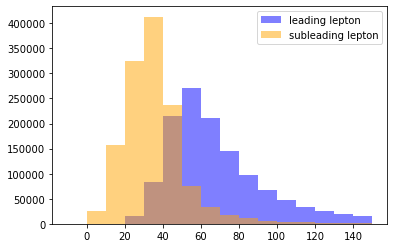

In [41]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8,6))

center_bin_edges = upper_bin_edges-bin_width/2.

#plt.plot(center_bin_edges, h_lep_1_pt, label = 'leading lepton', ls = "step")
#plt.plot(center_bin_edges, h_lep_2_pt, label = 'subleading lepton', ls = "step")

plt.bar(center_bin_edges, h_lep_1_pt, width=bin_width, label = 'leading lepton', alpha=0.5, color='blue')
plt.bar(center_bin_edges, h_lep_2_pt, width=bin_width, label = 'subleading lepton', alpha=0.5, color='orange')
legend = plt.legend(loc="upper right")

plt.show()



Questions:
- What units would you assign the y-axis of your histogram?
- Is the charge diagram a histogram?
- Bonus: What is the invariant mass of the dijet system in the dijet production rest frame?

In [55]:
# define your histogram in numpy method 1

bin_width = 2 # GeV
max_M = 150 # GeV
hrange = (0, max_M)
bins = int((hrange[1]-hrange[0])/bin_width)

upper_bin_edges = np.array(np.arange(0, max_M+bin_width, bin_width))
print('histogram bin edges: ', upper_bin_edges)
h_lep12_M = np.array(np.zeros(len(upper_bin_edges)))

dileptonM_GeV = np.array(dilepton_masses)*1e-3

for i, dM in enumerate(dileptonM_GeV):
    for bin_idx, bin_edge in enumerate(upper_bin_edges):
        if dM < bin_edge:
            h_lep12_M[bin_idx]+=1
            break

            
np_lep12_M, np_bin_edges = np.histogram(dileptonM_GeV, bins=bins, range=hrange)

print('numpy bin edges: ', np_bin_edges)

print(dileptonM_GeV[:20])
print(h_lep12_M.astype(float))
print(np_lep12_M)


#plt.bar()



histogram bin edges:  [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150]
numpy bin edges:  [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150.]
[92.51183398 91.18536494 86.22926735 92.12268116 89.33263157 90.47458352
 90.79151521 94.37415405 93.59602135 94.20400234 91.07655424 91.96681672
 92.96844953 91.2713793  91.42327728 90.08443762 88.54404605 91.01927039
 88.52065444 59.95488831]
[ 0.  0.  0.  0.  

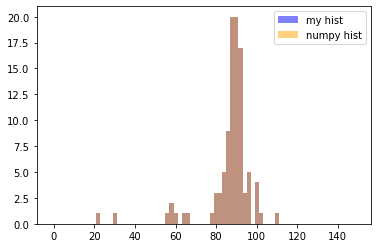

In [56]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8,6))

#lower_bin_edges = upper_bin_edges-bin_width/2.
#np_center_bin_edges = np_bin_edges-bin_width/2.


#plt.plot(center_bin_edges, h_lep_1_pt, label = 'leading lepton', ls = "step")
#plt.plot(center_bin_edges, h_lep_2_pt, label = 'subleading lepton', ls = "step")

plt.bar(upper_bin_edges[:-1], h_lep12_M[1:], width=bin_width, label = 'my hist', color='blue', alpha=0.5)
plt.bar(np_bin_edges[:-1], np_lep12_M, width=bin_width, label = 'numpy hist', color='orange', alpha=0.5)
legend = plt.legend(loc="upper right")

plt.show()
